In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

In [3]:
# extract = true extracts downloaded data and creates folder containing all data in .keras
path_to_zip = tf.keras.utils.get_file("cats_and_dogs.zip", origin = _URL, extract = True)

68608000/68606236 [==============================] - 163s 2us/step


In [4]:
PATH = os.path.join(os.path.dirname(path_to_zip), "cats_and_dogs_filtered")

PATH

'C:\\Users\\Neo\\.keras\\datasets\\cats_and_dogs_filtered'

In [5]:
train_dir = os.path.join(PATH, "train")

train_dir

'C:\\Users\\Neo\\.keras\\datasets\\cats_and_dogs_filtered\\train'

In [6]:
train_cats_dir = os.path.join(train_dir, "cats")

train_cats_dir

'C:\\Users\\Neo\\.keras\\datasets\\cats_and_dogs_filtered\\train\\cats'

In [7]:
batch_size = 128
IMG_HEIGHT = 150
IMG_WIDTH  = 150

In [8]:
# gen obj for rescaling image btw 0 - 1
train_image_generator = ImageDataGenerator(rescale = 1./255.)

In [9]:
# gen ret 128 batch of images of images from dir
train_image_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_dir,
                                                           shuffle = True,
                                                           target_size = [IMG_HEIGHT, IMG_WIDTH])

Found 2000 images belonging to 2 classes.


In [10]:
def plot_image(image):
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

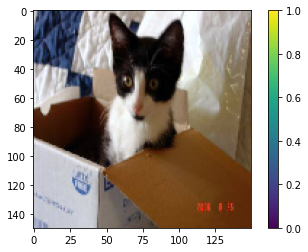

In [11]:
plot_image(train_image_gen[0][0][0])

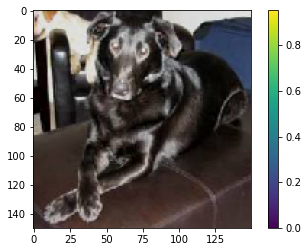

In [12]:
plot_image(train_image_gen[3][0][0])

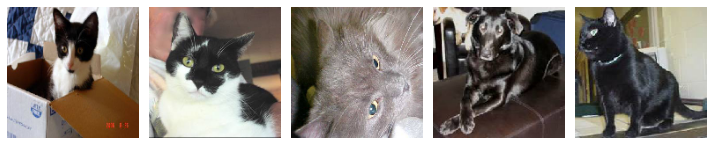

In [15]:
# helper to plot 5 images
def plot_5_images(images):
    fig, axes = plt.subplots(1, 5, figsize = (10, 10))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()
    
    
images = [train_image_gen[i][0][0] for i in range(5)]

plot_5_images(images)

**Image Data Aug**

Found 2000 images belonging to 2 classes.


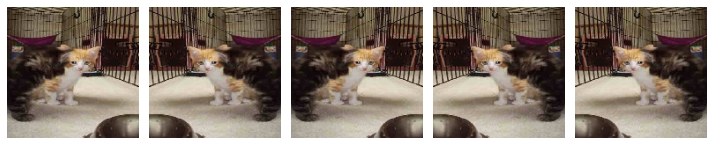

In [17]:
image_gen2 = ImageDataGenerator(rescale = 1./255., horizontal_flip=True)
train_data_gen2 = image_gen2.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = [IMG_HEIGHT, IMG_WIDTH])

# gets flipped images of same image
flipped_images = [train_data_gen2[0][0][0] for i in range(5)]

plot_5_images(flipped_images)